In [78]:
print(" Murali's First end to end project")
print (" This is what you always wanted to do ")
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import BayesianRidge, LinearRegression,LogisticRegression
from sklearn.cross_validation import train_test_split
 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

 Murali's First end to end project
 This is what you always wanted to do 


In [79]:
# Import the data 
# Decide on the variable types 
# Everything is learning

inputfile = "/Users/murali/SMU/lab2/SMUMSDS2016/data/income.csv"
dfincome = pd.read_csv(inputfile)
dfincome.info()
dfincome.columns
dfincome.index
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


RangeIndex(start=0, stop=32561, step=1)

In [81]:
# Work with work class
# work with education
# work with education_num
# Work with maritial_status 
# work with Occupation
# work with race 
# work with sex 
# work with capitalgain
# work with capital loss 
# work with hours-per-week

dfincome.workclass = dfincome.workclass.replace(' ?','NotReported')
dfincome.occupation = dfincome.occupation.replace(' ?','NotReported')
dfincome.workclass = dfincome.workclass.str.strip().replace('Never-worked','NotWorked')
dfincome['native-country'] = dfincome['native-country'].replace(' ?','NotReported')
dfincome['native-country'] = dfincome['native-country'].str.strip().replace('United-States','US')

targetfinal = []
for row in dfincome['target']:
    if row.strip() == '<=50K':
        targetfinal.append(0) 
    
    else:
        targetfinal.append(1)
dfincome['targetfinal'] = targetfinal



In [82]:
dfincome.targetfinal.unique()

array([0, 1])

In [83]:
dfabove50K = pd.DataFrame()
dfbelow50K = pd.DataFrame()
#dfbelow50K = dfincome[[df]'age'].dfincome[dfincome['target'].str.strip() == '<=50K']
#dfbelow50K = dfincome[dfincome['age'] & dfincome['targetfinal'] == '0' ]
#dfabove50K = dfincome[dfincome['target'].str.strip() == '>50K']

dfbelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['age','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['age','targetfinal']])


In [84]:
dfbelow50K['COUNTER'] = 1
dfabove50K['COUNTER'] = 1
dfbelow50K =  dfbelow50K.groupby('age')['COUNTER'].count() 
dfabove50K = dfabove50K.groupby('age')['COUNTER'].count()

 

 
 
 

In [85]:
dfincome.targetfinal.unique()

array([0, 1])

In [86]:
#type(dfbelow50K)
#dfbelow50K 

X = []
Y1 = []
for row in dfbelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfabove50K.iteritems():
    Y2.append(row[1])
    

 

In [87]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title=" Age",
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')


PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [88]:
# Heat Map for Age 
# Index is the age
# Create a Pandas Series 
 
dfageHeatmap1 = pd.DataFrame()
dfageHeatmap2 = pd.DataFrame()
 
dfageHeatmap1['<50K'] = Y1
dfageHeatmap2['>=50K'] = Y2
dfageHeatMap = pd.concat([dfageHeatmap1,dfageHeatmap2], ignore_index=True, axis=1)
dfageHeatMap.index = X
dfageHeatMap.columns = ['<50K','>=50K']

dfageHeatMap['>=50K'].fillna('0',inplace=True)

# Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfageHeatMap.columns , z=dfageHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")


PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [89]:
dfageHeatMap.columns

Index([u'<50K', u'>=50K'], dtype='object')

In [90]:
# Get education-num  and get marital-status 

dfedubelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['education-num','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfeduabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['education-num','targetfinal']])

dfedubelow50K['COUNTER'] = 1
dfeduabove50K['COUNTER'] = 1
dfedubelow50K =  dfedubelow50K.groupby('education-num')['COUNTER'].count() 
dfeduabove50K = dfeduabove50K.groupby('education-num')['COUNTER'].count()

In [91]:
X = []
Y1 = []
for row in dfedubelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfeduabove50K.iteritems():
    Y2.append(row[1])

In [92]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Number of years of Education',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [93]:
dfeduHeatmap1 = pd.DataFrame()
dfeduHeatmap2 = pd.DataFrame()
 
dfeduHeatmap1['<50K'] = Y1
dfeduHeatmap2['>=50K'] = Y2
dfeduHeatMap = pd.concat([dfeduHeatmap1,dfeduHeatmap2], ignore_index=True, axis=1)
dfeduHeatMap.index = X
dfeduHeatMap.columns = ['<50K','>=50K']

dfeduHeatMap['>=50K'].fillna('0',inplace=True)

 # Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfeduHeatMap.columns , z=dfeduHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")

PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [94]:
# Get education-num  and get marital-status 

dfmarbelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['marital-status','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfmarabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['marital-status','targetfinal']])

dfmarbelow50K['COUNTER'] = 1
dfmarabove50K['COUNTER'] = 1
dfmarbelow50K =  dfmarbelow50K.groupby('marital-status')['COUNTER'].count() 
dfmarabove50K = dfmarabove50K.groupby('marital-status')['COUNTER'].count()

In [95]:
X = []
Y1 = []
for row in dfmarbelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfmarabove50K.iteritems():
    Y2.append(row[1])

In [96]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Marital Status',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [97]:
dfmarHeatmap1 = pd.DataFrame()
dfmarHeatmap2 = pd.DataFrame()
 
dfmarHeatmap1['<50K'] = Y1
dfmarHeatmap2['>=50K'] = Y2
dfmarHeatMap = pd.concat([dfmarHeatmap1,dfmarHeatmap2], ignore_index=True, axis=1)
dfmarHeatMap.index = X
dfmarHeatMap.columns = ['<50K','>=50K']

dfmarHeatMap['>=50K'].fillna('0',inplace=True)

 # Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfmarHeatMap.columns , z=dfmarHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")

PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [21]:
# Start Linear Regression and Logistic Regression 
# First let us transform using dummies 
# Let us draw and build the Bar chart , Line chart , Heat Map 
# Tasks Linear Regression , PAC , LCA, Logistics Regression - 2 hours 
# Detailed Task - Create Dummies 

#dfincome.info()


In [98]:
# Linear Regression 

#dfintermediate = dfincome
# Drop columns 
#dfintermediate = dfincome.drop('fnlwgt',axis=1)
#dfintermediate = dfincome.drop('target',axis=1)
#dfintermediate = dfincome.drop('targetfinal',axis=1)

 

#dfintermediate.drop('fnlwgt',axis=1,inplace=True)
#dfintermediate.drop('target',axis=1,inplace=True)
#dfintermediate.drop('targetfinal',axis=1,inplace=True)
dfintermediate = dfincome.copy()



In [100]:
dfintermediate.drop('fnlwgt',axis=1,inplace=True)
dfintermediate.drop('target',axis=1,inplace=True)
dfintermediate.drop('targetfinal',axis=1,inplace=True)

ValueError: labels ['fnlwgt'] not contained in axis

In [101]:
dfintermediate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [102]:
dfintermediate.values

array([[39, 'State-gov', ' Bachelors', ..., 0, 40, 'US'],
       [50, 'Self-emp-not-inc', ' Bachelors', ..., 0, 13, 'US'],
       [38, 'Private', ' HS-grad', ..., 0, 40, 'US'],
       ..., 
       [58, 'Private', ' HS-grad', ..., 0, 40, 'US'],
       [22, 'Private', ' HS-grad', ..., 0, 20, 'US'],
       [52, 'Self-emp-inc', ' HS-grad', ..., 0, 40, 'US']], dtype=object)

In [104]:
 
# Do the Dummies 
df_dummies = pd.get_dummies(dfintermediate)
df_dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_NotReported,workclass_NotWorked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_US,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Let us do Linear Regression 

income_x = df_dummies.values
income_y = dfincome['targetfinal']

# Split Data into train and test 
income_X_train = income_x[:-20]
income_X_test = income_x[-20:]

income_y_train = income_y[:-20]
income_y_test = income_y[-20:]

#print income_y_train

regr = linear_model.LinearRegression()
regr.fit(income_X_train, income_y_train)
#print('Coefficients: \n', regr.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
#df_coeff['Coefficients'] = regr.coef_

regr.coef_.size

107

In [107]:
dfc = pd.DataFrame()
dfc['Features'] = df_dummies.columns
dfc['coefficients'] = regr.coef_

In [31]:
#dfc

In [108]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=dfc['coefficients'],
            y=dfc['Features'],
            orientation = 'h'
)]

py.iplot(data, filename='horizontal-bar')

# Number of Years of education is highly co related with the target 


PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

In [109]:
# The mean squared error
print("Mean squared error: %.2f"  % np.mean((regr.predict(income_X_test) - income_y_test) ** 2))
# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % regr.score(income_X_test, income_y_test))

print("Mean squared error: %.2f"% np.mean((regr.predict(income_X_test) - income_y_test) ** 2))


Mean squared error: 0.11
Variance score: 0.33
Mean squared error: 0.11


In [110]:
clf = BayesianRidge(compute_score=True)
clf.fit(income_X_train, income_y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [35]:
# This code did not complete 
#n_features = income_X_train.size
#w = np.zeros(n_features)
#lw = 2
#plt.figure(figsize=(6, 5))
#plt.title("Weights of the model")
#plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
 #        label="Bayesian Ridge estimate")
#plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
#plt.plot(regr.coef_, color='navy', linestyle='--', label="OLS estimate")
#plt.xlabel("Features")
#plt.ylabel("Values of the weights")
#plt.legend(loc="best", prop=dict(size=12))

#plt.figure(figsize=(6, 5))
#plt.title("Histogram of the weights")
#plt.hist(clf.coef_, bins=n_features, color='gold', log=True)
#plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
  #          color='navy', label="Relevant features")
#plt.ylabel("Features")
#plt.xlabel("Values of the weights")
#plt.legend(loc="upper left")

#plt.figure(figsize=(6, 5))
#plt.title("Marginal log-likelihood")
#plt.plot(clf.scores_, color='navy', linewidth=lw)
#plt.ylabel("Score")
#plt.xlabel("Iterations")
#plt.show()

In [111]:
income_x

array([[  3.90e+01,   1.30e+01,   2.17e+03, ...,   1.00e+00,   0.00e+00,
          0.00e+00],
       [  5.00e+01,   1.30e+01,   0.00e+00, ...,   1.00e+00,   0.00e+00,
          0.00e+00],
       [  3.80e+01,   9.00e+00,   0.00e+00, ...,   1.00e+00,   0.00e+00,
          0.00e+00],
       ..., 
       [  5.80e+01,   9.00e+00,   0.00e+00, ...,   1.00e+00,   0.00e+00,
          0.00e+00],
       [  2.20e+01,   9.00e+00,   0.00e+00, ...,   1.00e+00,   0.00e+00,
          0.00e+00],
       [  5.20e+01,   9.00e+00,   1.50e+04, ...,   1.00e+00,   0.00e+00,
          0.00e+00]])

In [112]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

print (" Start PCA ")
pca = decomposition.PCA(n_components=3)
pca.fit(income_x)
income_x1 = pca.transform(income_x)
pca_score = pca.explained_variance_ratio_
print pca_score
y = income_y
#V = pca.components_
#print(pca.explained_variance_ratio_) 
#print ("Components is ")
#print V
#V.size
 

 Start PCA 
[  9.97e-01   2.97e-03   3.42e-06]


/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



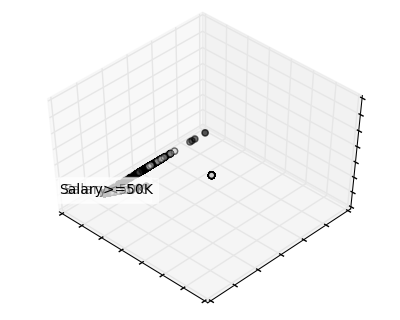

In [35]:

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Salary<50K', 0), ('Salary>=50K', 1) ]:
    ax.text3D(income_x1[y == label, 0].mean(),
              income_x1[y == label, 1].mean() + 1.5,
               income_x1[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2,0]).astype(np.float)
ax.scatter(income_x1[:, 0], income_x1[:, 1],income_x[:,2],  c=y, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [113]:
#print(pca.explained_variance_ratio_) 
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

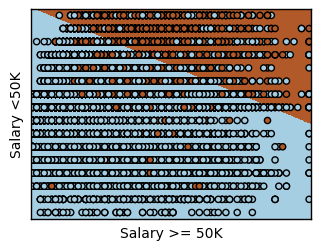

In [114]:

#dfincome.info()

# Logistic Regression 

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
# Will hit memory error so let us train only first two features 
X = income_X_train[:, :2]
Y = income_y_train
#logreg.fit(income_X_train, income_y_train)
logreg.fit(X, income_y_train)
h = .02 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#x_min, x_max = income_x.min() - .5, income_x.max() + .5
#y_min, y_max = income_x.min() - .5, income_x.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(income_x,  c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Salary >= 50K')
plt.ylabel('Salary <50K')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [115]:
# Train test and split

X_train, X_test, y_train, y_test = train_test_split(
     df_dummies, targetfinal, test_size=0.33, random_state=42)



In [116]:

  
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB() 
#XG = df_dummies.values 
#YG =  np.asarray(targetfinal )
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_train)
#y_pred = gnb.fit(incomecoded_x, income_y).predict(income_y)
#print y_pred
print("Number of mislabeled points out of a total %d points : %d"     % (X_train.shape[0],(y_train!= y_pred).sum()))
 

Number of mislabeled points out of a total 21815 points : 5190


In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import coverage_error
confusion_matrix(y_train,y_pred)
accuracy_score(y_train,y_pred)
#coverage_error(y_train, y_pred)

0.76209030483612195

In [120]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average='micro') 

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning:

From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.



0.61674789543642006

In [121]:
cm = confusion_matrix(y_train,y_pred)
class_names = ['<50K','>=50K']

Confusion matrix, without normalization
[[12449  4075]
 [ 1115  4176]]
Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.21  0.79]]


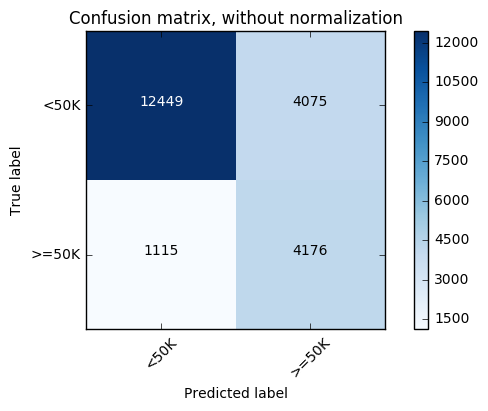

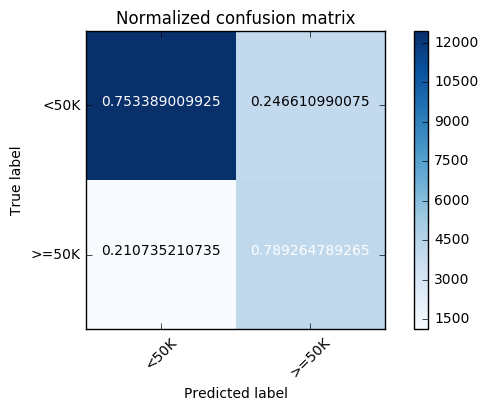

In [122]:
#Plot Confusion Matrix 
# Code from scikit-learn 
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [125]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train,y_train)
y_pred = mb.predict(X_train)

print("Number of mislabeled points out of a total %d points : %d"     % (X_train.shape[0],(y_train!= y_pred).sum()))
 


Number of mislabeled points out of a total 21815 points : 4858


In [126]:
 
accuracy_score(y_train,y_pred)

0.77730919092367634

In [127]:
cm = confusion_matrix(y_train,y_pred)

Confusion matrix, without normalization
[[15836   688]
 [ 4170  1121]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.79  0.21]]


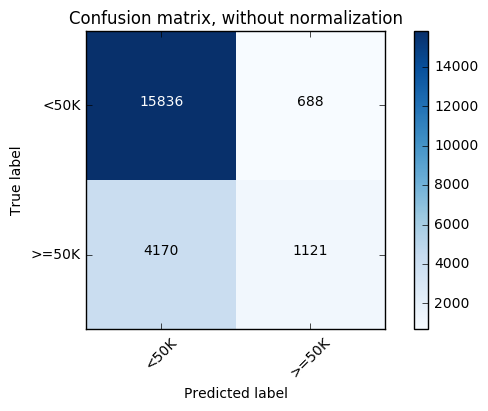

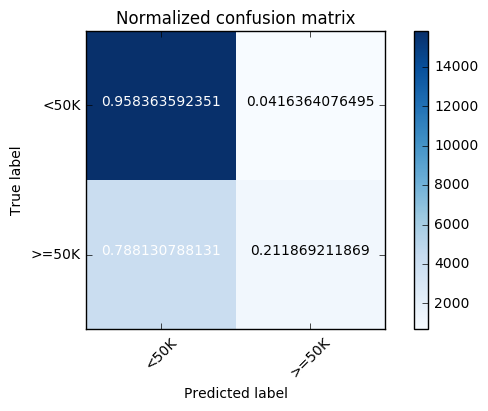

In [128]:
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

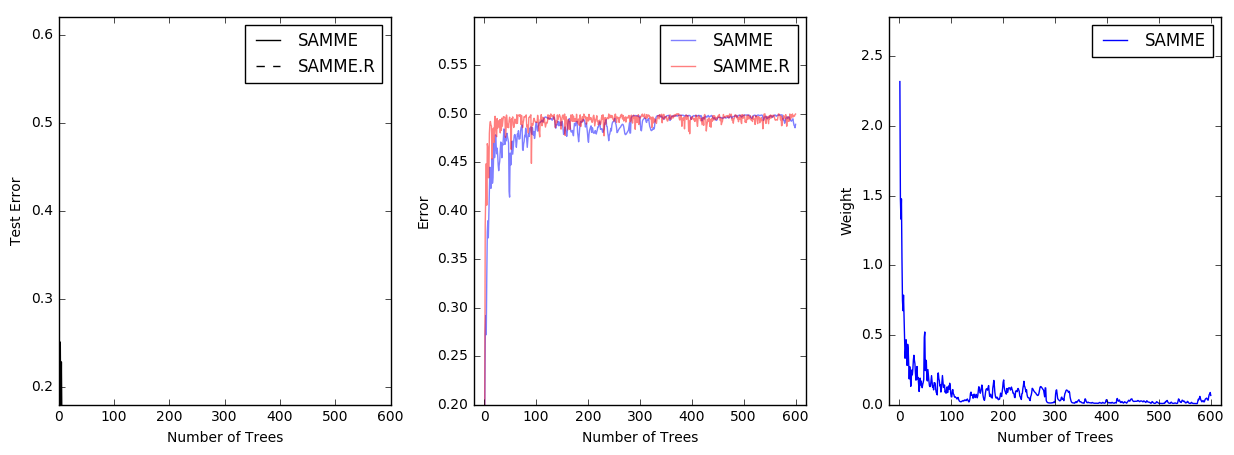

In [131]:
# Multi Class ADA Boosting 
# Review the Number of Trees 
# Code from scikit Learn
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = df_dummies
Y = targetfinal
n_split = 6000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [56]:
# Murali GraveYard Code 
#Start Label Encoding 
# Do PCA and LDA for Label Encoding  
#lworkclass = dfincome.workclass.unique()
#le = preprocessing.LabelEncoder()
#le.fit(lworkclass)
#finalworkclass = le.transform(dfincome.workclass)
#finalworkclass
#lmaritialStatus = dfincome['marital-status'].unique()
#lemaritialstatus = preprocessing.LabelEncoder()
#lemaritialstatus.fit(lmaritialStatus)
#finalmaritialStatus = lemaritialstatus.transform(dfincome['marital-status'])

#loccupation = dfincome['occupation'].unique()
#leoccupation = preprocessing.LabelEncoder()
#leoccupation.fit(loccupation)
#finaloccupation = leoccupation.transform(dfincome['occupation'])

#relationship
#relationship
#lrelationship = dfincome['relationship'].unique()
#lerelationship = preprocessing.LabelEncoder()
#lerelationship.fit(lrelationship)
#finalrelationship = lerelationship.transform(dfincome['relationship'])

#loccupation = dfincome['occupation'].unique()
#leoccupation = preprocessing.LabelEncoder()
#leoccupation.fit(loccupation)
#finaloccupation = leoccupation.transform(dfincome['occupation'])

#relationship
#relationship
#lrelationship = dfincome['relationship'].unique()
#lerelationship = preprocessing.LabelEncoder()
#lerelationship.fit(lrelationship)
#finalrelationship = lerelationship.transform(dfincome['relationship'])

#race
#race
#lrace = dfincome['race'].unique()
#lerace = preprocessing.LabelEncoder()
#lerace.fit(lrace)
#finalrace = lerace.transform(dfincome['race'])

#lsex = dfincome['sex'].unique()
#lesex = preprocessing.LabelEncoder()
#lesex.fit(lsex)
#finalsex = lesex.transform(dfincome['sex'])

#lneducation = dfincome['education'].unique()
#leeducation = preprocessing.LabelEncoder()
#leeducation.fit(lneducation)
#finaleducation = leeducation.transform(dfincome['education'])

#from sklearn.preprocessing import MinMaxScaler
#lcapitalgain = MinMaxScaler(feature_range=(0,100)).fit_transform(dfincome['capital-gain'])
#lcapitalloss = MinMaxScaler(feature_range=(0,100)).fit_transform(dfincome['capital-loss'])
#lhoursofweek = MinMaxScaler(feature_range=(0,40)).fit_transform(dfincome['hours-per-week'])
#leducationnum = MinMaxScaler(feature_range=(0,25)).fit_transform(dfincome['education-num'])


#dfincomecoded = pd.DataFrame()
#dfincomecoded['workclass'] = finalworkclass
#dfincomecoded['maritialstatus'] = finalmaritialStatus
#dfincomecoded['relationship'] = finalrelationship
##dfincomecoded['race'] = finalrace
#dfincomecoded['sex'] = finalsex
##dfincomecoded['nativecountry'] = finalnativecountry
#dfincomecoded['education'] = finaleducation
#dfincomecoded['capitalgain'] = lcapitalgain
#dfincomecoded['capitalloss'] = lcapitalloss
#dfincomecoded['hoursperweek'] = lhoursofweek
##dfincomecoded['educationNum'] = leducationnum
#dfincomecoded['targetFinal']  = dfincome['targetfinal']

#income_y = dfincomecoded['targetFinal'].as_matrix()

#incomecoded_x = dfincomecoded.drop['targetFinal']

 #Fun starts now 
# Start with Bayes Classifier 


#from sklearn import datasets
#iris = datasets.load_iris()
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(incomecoded_x,income_y)
#gnb.predict(income_y)
#y_pred = gnb.fit(incomecoded_x, income_y).predict(income_y)
#print y_pred
#print("Number of mislabeled points out of a total %d points : %d"     % (incomecoded_x.shape[0],(income_y != y_pred).sum()))
 
